Boston RMSE: 5.272268556515519


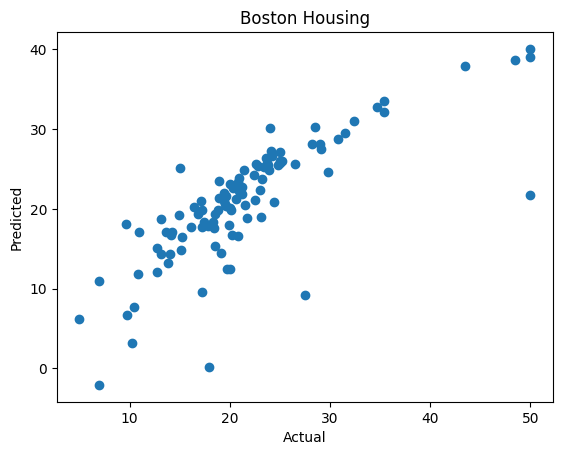

Auto MPG R²: 0.6383217814069445


c:\Users\sajal\Desktop\ml short prog\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


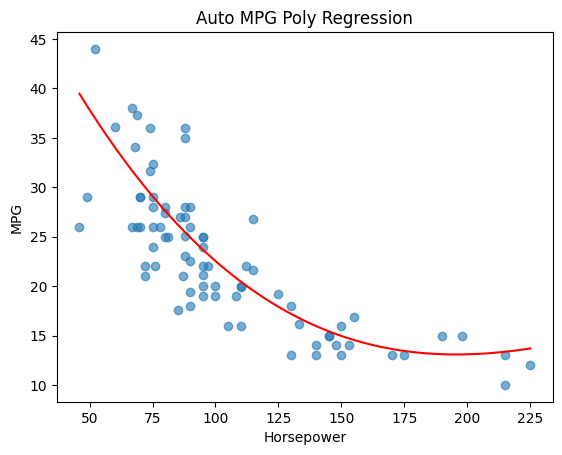

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

# Linear Regression — Boston Housing
df = pd.read_csv("BostonHousing.csv")
x = df[['indus', 'nox', 'rm', 'tax', 'ptratio', 'lstat']]
y = df['medv']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Boston RMSE:", np.sqrt(mse))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual'); plt.ylabel('Predicted'); plt.title('Boston Housing')
plt.show()

# Polynomial Regression — Auto MPG
data = fetch_openml(name="autoMpg", version=1, as_frame=True)
df2 = data.frame.dropna(subset=["horsepower"])
x2 = df2[["horsepower"]].astype(float)
y2 = data.target.loc[df2.index].astype(float)  # use target from OpenML object
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)
poly = PolynomialFeatures(degree=3)
x2_train_poly = poly.fit_transform(x2_train)
x2_test_poly = poly.transform(x2_test)
model2 = LinearRegression()
model2.fit(x2_train_poly, y2_train)
y2_pred = model2.predict(x2_test_poly)
print("Auto MPG R²:", r2_score(y2_test, y2_pred))
plt.scatter(x2_test, y2_test, alpha=0.6)
x_plot = np.linspace(x2_test.min(), x2_test.max(), 100)
y_plot = model2.predict(poly.transform(x_plot))
plt.plot(x_plot, y_plot, color="red")
plt.xlabel("Horsepower"); plt.ylabel("MPG"); plt.title("Auto MPG Poly Regression")
plt.show()
